# S&P 500 Data Analysis and Preprocessing

This notebook focuses on analyzing historical S&P 500 index data obtained using the `yfinance` library. The workflow includes:

- **Data Acquisition:**  
    The S&P 500 data (`sp500`) is downloaded for the period from May 23, 2022, to May 22, 2025. The dataset contains daily values for Close, High, Low, Open, and Volume.

- **Data Preprocessing:**  
    A new DataFrame (`trimmed_data`) is created to focus on the 'Close' price. The daily log returns are calculated to analyze the percentage change in closing prices, which is a common step in financial time series analysis.  
    Missing values resulting from the log return calculation are identified and can be handled as needed.

- **Exploratory Analysis:**  
    The notebook provides an overview of the data structure, types, and summary statistics, setting the stage for further analysis or modeling.

This structured approach ensures the data is clean and ready for subsequent financial analysis or predictive modeling tasks.

# Documentation for the S&P 500 Dataset

## S&P 500 Dataset Overview

This dataset contains historical daily data for the S&P 500 index, retrieved using the `yfinance` library. The data spans from May 23, 2022, to May 22, 2025, and is indexed by date.

### Features

- **Close:** The closing price of the S&P 500 index for each trading day.  
- **High:** The highest price reached by the S&P 500 index during the trading day.  
- **Low:** The lowest price reached by the S&P 500 index during the trading day.  
- **Open:** The opening price of the S&P 500 index at the start of the trading day.  
- **Volume:** The total number of shares traded for all the constituent stocks in the S&P 500 index during the trading day.

> **Note:**  
> The columns are multi-indexed as `(Feature, ^GSPC)` due to the data structure returned by `yfinance`.

### Preprocessed Data

- The `trimmed_data` DataFrame focuses on the 'Close' price and contains the daily log returns, which represent the percentage change in closing prices from one day to the next.  
- Log returns are commonly used in financial analysis for their statistical properties.  
- The first row contains a `NaN` value due to the nature of the log return calculation.

### Example Data

#### `sp500` DataFrame (first 5 rows):

| Date       | (Close, ^GSPC) | (High, ^GSPC) | (Low, ^GSPC) | (Open, ^GSPC) | (Volume, ^GSPC) |
|------------|----------------|---------------|--------------|---------------|-----------------|
| 2022-05-23 | 3973.75        | 3981.88       | 3909.04      | 3919.42       | 4420030000      |
| 2022-05-24 | 3941.48        | 3955.68       | 3875.13      | 3942.94       | 4923190000      |
| 2022-05-25 | 3978.73        | 3999.33       | 3925.03      | 3929.59       | 4802560000      |
| 2022-05-26 | 4057.84        | 4075.14       | 3984.60      | 3984.60       | 4709970000      |
| 2022-05-27 | 4158.24        | 4158.49       | 4077.43      | 4077.43       | 4375620000      |

#### `trimmed_data` DataFrame (first 5 rows):

| Date       | (Close, ^GSPC) |
|------------|----------------|
| 2022-05-23 | NaN            |
| 2022-05-24 | -0.008154      |
| 2022-05-25 | 0.009406       |
| 2022-05-26 | 0.019688       |
| 2022-05-27 | 0.024441       |

### Usage

This dataset is suitable for time series analysis, financial modeling, and exploratory data analysis related to the S&P 500 index.

In [20]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Load S&P 500 data (^GSPC)
sp500 = yf.download('^GSPC', start='2022-05-23', end='2025-05-23')

# Display the first few rows of the S&P 500 data
display(sp500.head())


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2022-05-23,3973.750000,3981.879883,3909.040039,3919.419922,4420030000
2022-05-24,3941.479980,3955.679932,3875.129883,3942.939941,4923190000
2022-05-25,3978.729980,3999.330078,3925.030029,3929.590088,4802560000
2022-05-26,4057.840088,4075.139893,3984.600098,3984.600098,4709970000
2022-05-27,4158.240234,4158.490234,4077.429932,4077.429932,4375620000


In [21]:
type(sp500)

pandas.core.frame.DataFrame

In [22]:
trimmed_data = sp500[['Close']].copy()

In [23]:
trimmed_data.head()

Price,Close
Ticker,^GSPC
Date,
2022-05-23,3973.750000
2022-05-24,3941.479980
2022-05-25,3978.729980
2022-05-26,4057.840088
2022-05-27,4158.240234


In [24]:
trimmed_data.index

DatetimeIndex(['2022-05-23', '2022-05-24', '2022-05-25', '2022-05-26',
               '2022-05-27', '2022-05-31', '2022-06-01', '2022-06-02',
               '2022-06-03', '2022-06-06',
               ...
               '2025-05-09', '2025-05-12', '2025-05-13', '2025-05-14',
               '2025-05-15', '2025-05-16', '2025-05-19', '2025-05-20',
               '2025-05-21', '2025-05-22'],
              dtype='datetime64[ns]', name='Date', length=753, freq=None)

In [25]:
trimmed_data.columns

MultiIndex([('Close', '^GSPC')],
           names=['Price', 'Ticker'])

In [26]:
trimmed_data.head()

Price,Close
Ticker,^GSPC
Date,
2022-05-23,3973.750000
2022-05-24,3941.479980
2022-05-25,3978.729980
2022-05-26,4057.840088
2022-05-27,4158.240234


In [27]:
trimmed_data['log_close'] = np.log(trimmed_data['Close'] / trimmed_data['Close'].shift(1))

In [28]:
trimmed_data.head()

Price,Close,log_close
Ticker,^GSPC,
Date,,
2022-05-23,3973.750000,NaN
2022-05-24,3941.479980,-0.008154
2022-05-25,3978.729980,0.009406
2022-05-26,4057.840088,0.019688
2022-05-27,4158.240234,0.024441


In [29]:
trimmed_data.isnull().sum()

Price      Ticker
Close      ^GSPC     0
log_close            1
dtype: int64

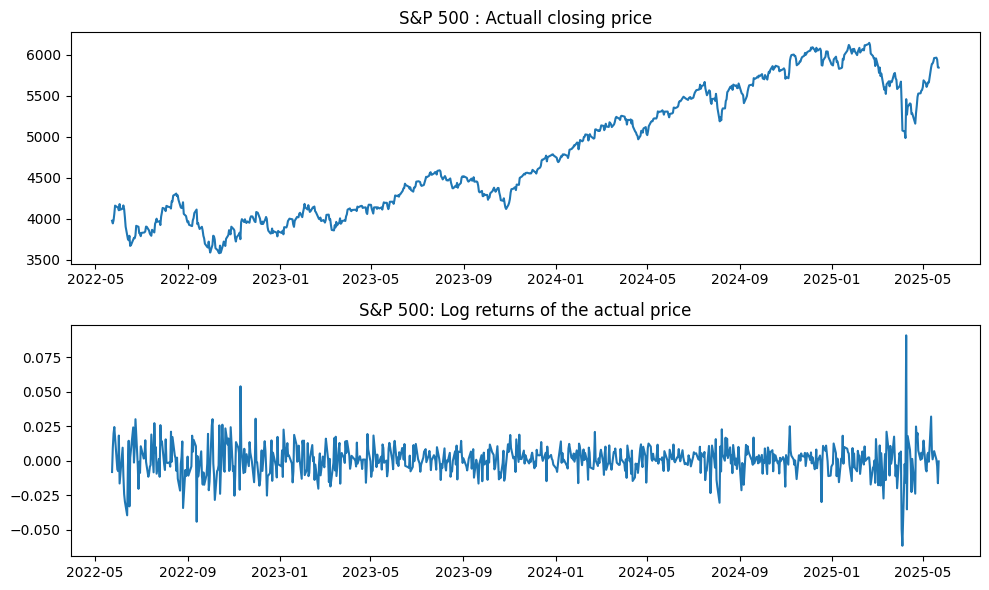

In [30]:
# Plotting the actual price and log returns
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(trimmed_data["Close"], label = "actuall closing price over the time ")
plt.title("S&P 500 : Actuall closing price")

plt.subplot(2, 1, 2)
plt.plot(trimmed_data["log_close"], label = "Log returns of the data")
plt.title("S&P 500: Log returns of the actual price")
plt.tight_layout()
plt.show()

In [32]:
# Checking stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(trimmed_data["log_close"].dropna())
print(f"ADF statistic: {result[0]}")
print(f"P-value: {result[1]}")

ADF statistic: -15.37944612068476
P-value: 3.423190100239358e-28


*Since the ADF shows that the data is stationary, Now shall check components of it to make sure the test is rather true*

In [34]:
from arch import arch_model
from statsmodels.stats.diagnostic import het_arch

arch_test = het_arch(trimmed_data["log_close"].dropna())
print(f"Arch Test p-value: {arch_test[1]}")

Arch Test p-value: 1.2154734853282173e-17


Since there is evidence of changing variance is there and we know for the data to be stationary, it shall have constant variance. Though we shall check the variannce seperately

/var/folders/mj/2jg_g38s4xs2kc17k972gjb80000gn/T/ipykernel_24052/2676849697.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


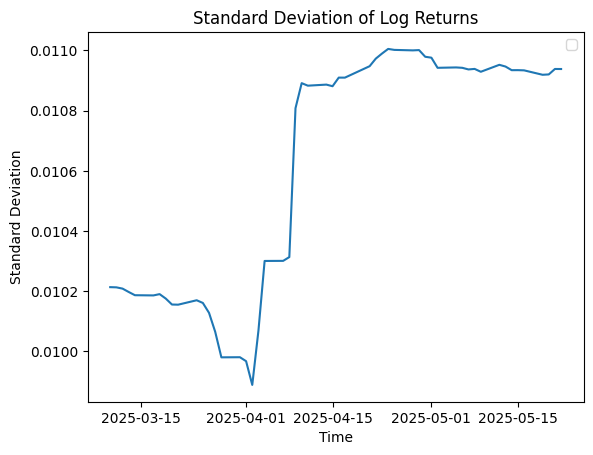

In [40]:
plt.plot(trimmed_data["log_close"].rolling(window=700).std())
plt.legend()
plt.title("Standard Deviation of Log Returns")
plt.xlabel("Time")
plt.ylabel("Standard Deviation")
plt.show()